# MNIST Handwritten Digit Classifier - Classify the Number

Given a dataset of 6,000 images of handwritten digits, train a neural network to identify the number.

In [9]:
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load and split data into training and test sets.

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [11]:
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=1/3)

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(49000, 28, 28)
(49000,)
(14000, 28, 28)
(14000,)
(7000, 28, 28)
(7000,)


Show one example digit.

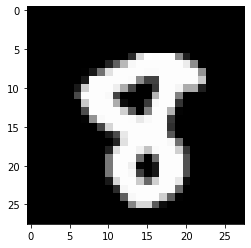

In [15]:
plt.imshow(X_train[1], cmap='gray')

In [16]:
y_train[1]

8

Prepare features and target for training.

In [19]:
image_height, image_width = 28, 28

X_train = X_train.reshape(49000, image_height*image_width)
X_val = X_val.reshape(14000, image_height*image_width)
X_test = X_test.reshape(7000, image_height*image_width)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_val /= 255.0
X_test /= 255.0

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(49000, 784)
(14000, 784)
(7000, 784)


In [20]:
y_train = to_categorical(y_train,10)
y_val = to_categorical(y_val,10)
y_test = to_categorical(y_test,10)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(49000, 10)
(14000, 10)
(7000, 10)


Train a neural network with 2 hidden layers of 64 nodes each.

In [21]:
model = Sequential()

In [22]:
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
1532/1532 [==============================] - 6s 3ms/step - loss: 0.2998 - accuracy: 0.9121 - val_loss: 0.1769 - val_accuracy: 0.9487
Epoch 2/20
1532/1532 [==============================] - 5s 4ms/step - loss: 0.1374 - accuracy: 0.9584 - val_loss: 0.1383 - val_accuracy: 0.9606
Epoch 3/20
1532/1532 [==============================] - 6s 4ms/step - loss: 0.0987 - accuracy: 0.9699 - val_loss: 0.1172 - val_accuracy: 0.9649
Epoch 4/20
1532/1532 [==============================] - 6s 4ms/step - loss: 0.0757 - accuracy: 0.9768 - val_loss: 0.1261 - val_accuracy: 0.9620
Epoch 5/20
1532/1532 [==============================] - 5s 3ms/step - loss: 0.0630 - accuracy: 0.9803 - val_loss: 0.0954 - val_accuracy: 0.9703
Epoch 6/20
1532/1532 [==============================] - 5s 3ms/step - loss: 0.0506 - accuracy: 0.9841 - val_loss: 0.1010 - val_accuracy: 0.9699
Epoch 7/20
1532/1532 [==============================] - 5s 3ms/step - loss: 0.0433 - accuracy: 0.9862 - val_loss: 0.1096 - val_accuracy:

Evaluate the model performance.

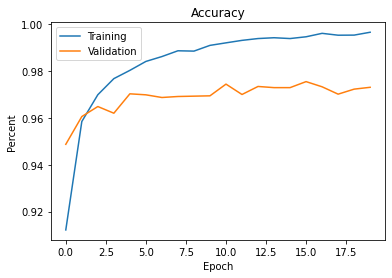

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('Epoch')
plt.ylabel('Percent')
plt.title('Accuracy')
plt.legend(['Training', 'Validation'])

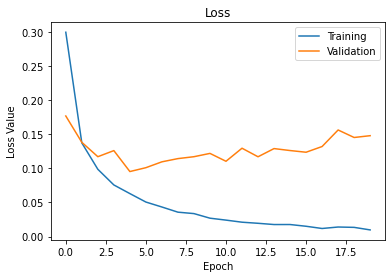

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.title('Loss')
plt.legend(['Training', 'Validation'])

In [28]:
score = model.evaluate(X_test, y_test)
score

219/219 [==============================] - 0s 2ms/step - loss: 0.1800 - accuracy: 0.9693


[0.17997093498706818, 0.9692857265472412]